In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from random import randint
import math
import time

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Dense
from keras import backend as K
from keras.models import load_model
from keras.utils import plot_model
from keras import regularizers

import scipy as sp
from scipy import io as spio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Functions definations
#extract data from Mat format and normalize the image
def extract(Data):
    features=[]
    output=[]
    for i in range (Data.shape[0]):
            features.append(Data[i,0])
            output.append(Data[i,1])
    features=np.array(features)
    output=np.array(output)
    features=np.reshape(features,[features.shape[0]*features.shape[1],28,28])/255.0 #normalize
    output=np.reshape(output,[output.shape[0]*output.shape[1],output.shape[2]])
    return features, np.array(output)
def hot_integer(y):
    #one hot to integer
    y=np.array(y)
    Y_temp = np.zeros(y.shape[0])
    for i in range(y.shape[0]):    
        Y_temp[i]=np.argmax(y[i])
    return np.array(Y_temp)

In [3]:
#Read Data
R_MNIST=spio.loadmat('./ReducedMNIST.mat')
R_MINST_Train=R_MNIST['SmallTrainData']
R_MINST_Test=R_MNIST['SmallTestData']

X_Train,Y_Train= extract(R_MINST_Train)
X_Test,Y_Test= extract(R_MINST_Test)

# some parameters
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)
batch_size = 32
num_classes = 10
epochs = 30
X_Train=X_Train.reshape(X_Train.shape[0], img_rows, img_cols, 1)
X_Test=X_Test.reshape(X_Test.shape[0], img_rows, img_cols, 1)

In [6]:
model= Sequential()
model.add(Conv2D(6, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid',strides=2))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid',strides=2))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))

In [7]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#Train CNN
tic = time.time()
hist=model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs)
toc = time.time()
print("\n elapsed time to train=",round(toc-tic,4),"sec\n")
model.save('./my_model.h5')  # creates a HDF5 file 'my_model.h5' to save model

Epoch 1/30
10000/10000 [==============================] - 224s 22ms/step - loss: 0.6661 - acc: 0.8369
Epoch 2/30
10000/10000 [==============================] - 240s 24ms/step - loss: 0.2455 - acc: 0.9533
Epoch 3/30
10000/10000 [==============================] - 240s 24ms/step - loss: 0.1799 - acc: 0.9665
Epoch 4/30
10000/10000 [==============================] - 239s 24ms/step - loss: 0.1472 - acc: 0.9709
Epoch 5/30
10000/10000 [==============================] - 239s 24ms/step - loss: 0.1168 - acc: 0.9787
Epoch 6/30
10000/10000 [==============================] - 237s 24ms/step - loss: 0.0940 - acc: 0.9816
Epoch 7/30
10000/10000 [==============================] - 237s 24ms/step - loss: 0.0847 - acc: 0.9816
Epoch 8/30
10000/10000 [==============================] - 238s 24ms/step - loss: 0.0670 - acc: 0.9888
Epoch 9/30
10000/10000 [==============================] - 236s 24ms/step - loss: 0.0599 - acc: 0.9881
Epoch 10/30
10000/10000 [==============================] - 235s 24ms/step - loss: 

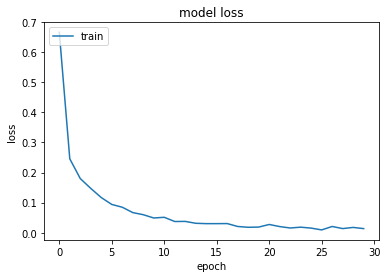

In [9]:
plt.pyplot.plot(hist.history['loss'])
plt.pyplot.title('model loss')
plt.pyplot.ylabel('loss')
plt.pyplot.xlabel('epoch')
plt.pyplot.legend(['train'], loc='upper left')

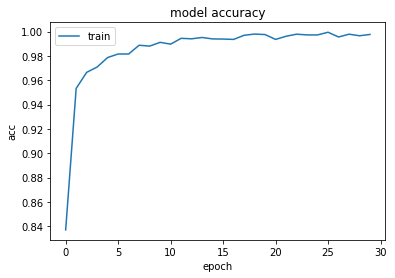

In [10]:
plt.pyplot.plot(hist.history['acc'])
plt.pyplot.title('model accuracy')
plt.pyplot.ylabel('acc')
plt.pyplot.xlabel('epoch')
plt.pyplot.legend(['train'], loc='upper left')

In [4]:
#load CNN model
model = load_model('./my_model.h5') #load saved model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 16)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               51400     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                16080     
__________

In [12]:
#graph CNN model
plot_model(model, to_file='./model.png',show_shapes=True)

In [5]:
score= model.evaluate(X_Test, Y_Test)
print("Test Accuracy =  "+ str(score[1]*100)+"%")

1000/1000 [==============================] - 7s 7ms/step
Test Accuracy =  98.2%


In [6]:
#predict for the test set
tic = time.time()
Y_predict=model.predict(X_Test)
toc = time.time()
print("elapsed time to predict=",round(toc-tic,4),"sec\n")

elapsed time to predict= 5.8566 sec



In [7]:
Y_pred=hot_integer(Y_predict)
Y_orig=hot_integer(Y_Test)

#calculate confusion matrix
confusion_mat = pd.crosstab(Y_orig,Y_pred,\
                            rownames=['Actual'],colnames=['Predicted'],margins=True)
display(confusion_mat)

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
Actual,,,,,,,,,,,
0.0,99,0,0,0,0,0,0,0,1,0,100
1.0,0,100,0,0,0,0,0,0,0,0,100
2.0,0,0,98,1,0,0,0,0,1,0,100
3.0,0,0,1,98,0,0,0,1,0,0,100
4.0,0,0,0,0,99,0,1,0,0,0,100
5.0,0,0,0,1,0,98,1,0,0,0,100
6.0,0,0,0,0,0,1,99,0,0,0,100
7.0,0,0,0,1,0,0,0,99,0,0,100
8.0,0,0,0,1,0,0,0,1,97,1,100


In [8]:
#free memory
del model #delete current model
K.clear_session()#clear old model